<a href="https://colab.research.google.com/github/vault5673/Decision-Trees-and-Random-Forests-/blob/main/Decision_Trees_and_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [17]:
# Load the dataset
df = pd.read_csv('heart.csv')

In [18]:
# Features and target
X = df.drop('target', axis=1)
y = df['target']

In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Train a Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

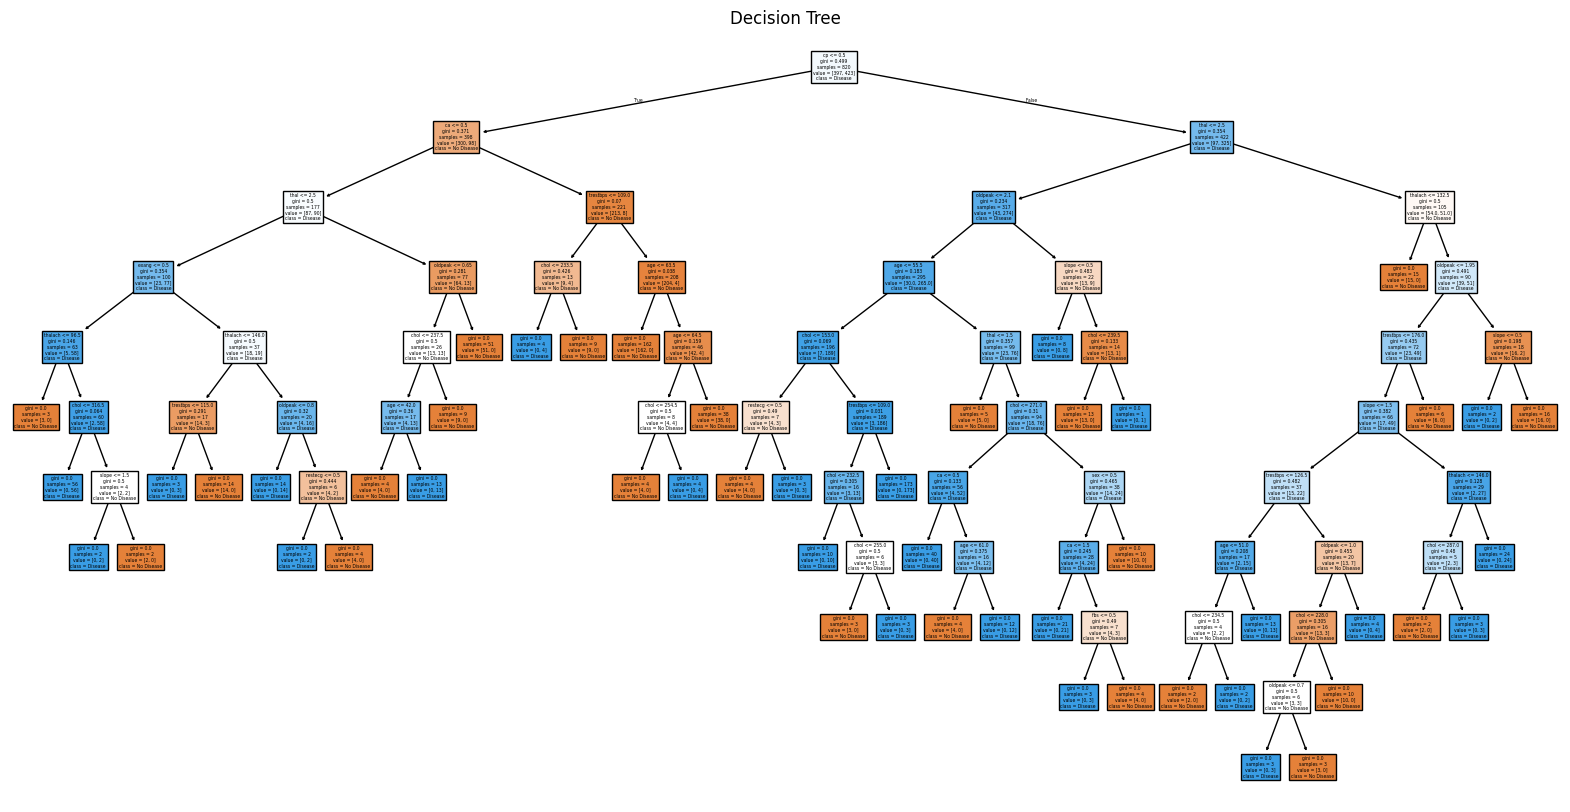

In [21]:
# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title("Decision Tree")
plt.show()

In [22]:
# Analyze overfitting by pruning the tree (limit depth)
dtree_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree_pruned.fit(X_train, y_train)
y_pred_pruned = dtree_pruned.predict(X_test)

In [23]:
# Accuracy for full and pruned trees
acc_full = accuracy_score(y_test, dtree.predict(X_test))
acc_pruned = accuracy_score(y_test, y_pred_pruned)

print("Accuracy (Full Tree):", acc_full)
print("Accuracy (Pruned Tree):", acc_pruned)

Accuracy (Full Tree): 0.9853658536585366
Accuracy (Pruned Tree): 0.8


In [24]:
# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy (Random Forest):", acc_rf)

Accuracy (Random Forest): 0.9853658536585366


In [25]:
# Feature Importances
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

print("\nFeature Importances:")
print(feat_imp)


Feature Importances:
cp          0.135072
ca          0.127327
thalach     0.122169
oldpeak     0.121905
thal        0.110518
age         0.077908
chol        0.074822
trestbps    0.071171
exang       0.057594
slope       0.045782
sex         0.028731
restecg     0.018557
fbs         0.008444
dtype: float64


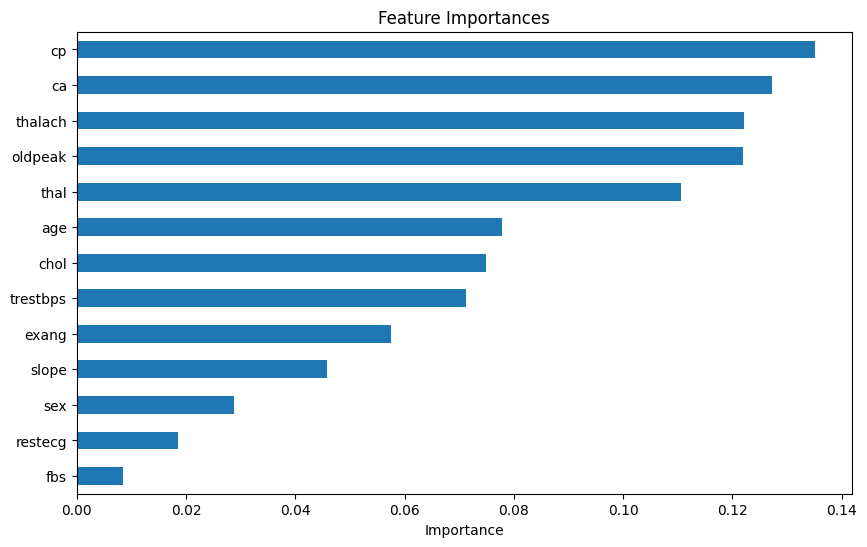

In [26]:
# Plot feature importances
feat_imp.plot(kind='barh', title='Feature Importances', figsize=(10,6))
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.show()

In [27]:
# Cross-validation scores
cv_scores_dtree = cross_val_score(dtree_pruned, X, y, cv=5)
cv_scores_rf = cross_val_score(rf, X, y, cv=5)

print("Cross-Validation (Pruned Tree):", cv_scores_dtree.mean())
print("Cross-Validation (Random Forest):", cv_scores_rf.mean())

Cross-Validation (Pruned Tree): 0.8341463414634147
Cross-Validation (Random Forest): 0.9970731707317073
